>>>> # Problem: Sales Data

<img src = 'img.jpg'>

**A company in the U.S asked us to help them analyze their one year data, so as to enable them make better decision the coming year.
They are interested in the following.**


- What was the best month for sales? how much was earned that month?
- What Product sold more?
- What time should we display advertisements to maximize likelihood of customer's buying product?


>>>> ## Steps

**For this problem, we will perform three basic steps**

+ Data Importation
+ Data Cleaning
+ Data Analysis


### Step 1: Data Importation

First we need to import the libraries for this analysis before moving on to import the data. the first library we will be using is the `Pandas` library, and we can import it using the `import` keyword, then we initialize it to `pd`.

In [2]:
import pandas as pd

To start, create a new folder in your working directory and call it `Sales_Data`, then download and copy the data to that folder. 


###### Reading CSV files

Pandas makes reading of csv files very easy, all you need to do is to simply use the `.read_csv()` function in pandas and pass in the name of the dataset enclosed in strings and the format.
Let’s try to read one of the sales data and see how it works.


In [3]:
data = pd.read_csv('Sales_Data/Sales_January_2019.csv')

To see the first few rows in your data, we simply use the `head()` method.


In [4]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Now that we have seen how to read a single `csv` file, let’s now see how we can read all the csv files in our Sales_Data folder at once.

In [5]:
import pandas as pd
import glob

path = './Sales_Data' #use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col= None, header=0)
    li.append(df)
    
data = pd.concat(li, axis=0, ignore_index=True)

In [6]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [7]:
data.shape

(186850, 6)

### Step 2: Data Cleaning


In doing exploratory data analysis, or even data science in general 70%  of your time is spent understanding and cleaning the data, so let’s see how we can clean up our data in order to make it useful for analysis.


The first thing we check for in our data is if it contains missing values, to do that we simply use `isnull()`, then to count the number of missing values that exists in each column, we simply use `sum()`.


###### Checking for missing values

In [8]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Notice that we have 545 missing values in each of our column. The next thing we do is to remove those missing values from our dataset. To do that, we use the `dropna()` function. After dropping the missing values, we check our data again for missing values.


###### Droping missing values

In [9]:
data.dropna(how='any', inplace=True)

In [10]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

To get the summary statistics of our data, we simply use ‘describe()’.


In [11]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Using the describe function give us the summary statistic of the columns in our dataset. Now let’s take a look at how we can index rows and columns in pandas dataframe.


###### Indexing in Dataframe

To index a column in pandas dataframe is very easy, all we have to do is call the variable name for the data, then enclose the column name in quote and insert it into a square bracket. This hence create a pandas series. For instance, say we want to index the ‘Product’ column in our dataframe, we simply do this: `data[‘Product’]`, where data is our variable name for the dataset.


In [12]:
data['Product']

0             Macbook Pro Laptop
1             LG Washing Machine
2           USB-C Charging Cable
3               27in FHD Monitor
4           USB-C Charging Cable
                   ...          
186845    AAA Batteries (4-pack)
186846          27in FHD Monitor
186847      USB-C Charging Cable
186848      USB-C Charging Cable
186849    AAA Batteries (4-pack)
Name: Product, Length: 186305, dtype: object

That creates a pandas series, so indexing a dataframe is similar to indexing a list as we saw in last weeks lecture, where we looked at list.
Now supposed we want to index more that one column, how do we do it. 
Well it’s simple, we simply use `[[ ]]`, the first square bracket signifies that you’re passing a list of columns, while the second just extracts the columns from the dataframe. Let’s look at an example



In [13]:
data[['Product', 'Quantity Ordered']]

,Product,Quantity Ordered
0,Macbook Pro Laptop,1
1,LG Washing Machine,1
2,USB-C Charging Cable,1
3,27in FHD Monitor,1
4,USB-C Charging Cable,1
...,...,...
186845,AAA Batteries (4-pack),1
186846,27in FHD Monitor,1
186847,USB-C Charging Cable,1
186848,USB-C Charging Cable,1


See how we were able to extract the two columns from the dataframe.
Now let’s see some other function that we can also use.

+ Say you want to see the list of columns in your dataset, you simply use `columns` function.



In [14]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

+ If you want to see the number of rows and columns in your dataset, you simply use the `shape` function.


In [15]:
data.shape

(186305, 6)

Notice that in our data, we have a `date and time column` called `Order Date`. But the column isn’t really in the right format; so we have to convert the column into the appropriate ‘date and time column’, so that it will be easier to work with. To do that, we use the `to_datetime()` function from the pandas library.


###### Converting the `Order Date` to the normal date-time format

In [16]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors = 'coerce')

In [17]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


Next, we create a column for the month, to do that, I have to index the month column `data[’Month’]` then I set it equal to the month value in the `Order Date` column by indexing it, an calling the value `data[‘Order Date’].dt.month`.


###### Creating a column for the Month

In [18]:
data['Month'] = data['Order Date'].dt.month

Having created the column for the month, we can also create another one for the hour, by simply following the same method we used for the month.


In [19]:
data['Hour'] = data['Order Date'].dt.hour

In [20]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,0.0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,7.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,18.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,15.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,12.0


Now we are all set to start doing analysis.


### Step 3: Data Analysis

Here we are going to be answering questions like:
    
+ What was the best month for sales? how much was earned that month?
+ What Product sold more?
+ What time should we display advertisements to maximize likelihood of customer's buying product?
So we start with the first question, but we notice that we don’t have a ‘Sales’ column in our dataset, but we know that `Sales = Price * quantity ordered`, so we create it.


In [21]:
data.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date          355
Purchase Address      0
Month               355
Hour                355
dtype: int64

In [22]:
data.dropna(how='any', inplace=True)

In [23]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Hour                0
dtype: int64

In [24]:
data['Sales'] = data['Quantity Ordered'].astype('int') * data['Price Each'].astype('float')

> ### 1. What was the best month for sales? how much was earned that month?


To answer the above question, we simply use the `‘groupby()’` function which is used to split data based on some criteria.
So to find out the months that made the most sales, we group the months based on the sales using the `groupby()` function and sum it.


In [25]:
data.groupby('Month')['Sales'].sum()

Month
1.0     1.822257e+06
2.0     2.202022e+06
3.0     2.807100e+06
4.0     3.390670e+06
5.0     3.152607e+06
6.0     2.577802e+06
7.0     2.647776e+06
8.0     2.244468e+06
9.0     2.097560e+06
10.0    3.736727e+06
11.0    3.199603e+06
12.0    4.613443e+06
Name: Sales, dtype: float64

Looking at the result, it is obvious to see that December has the highest number of sales. Now to make a plot of our results, we simply import the `‘pyplot’` function from a library called `‘matplotlib’` .


In [26]:
import matplotlib.pyplot as plt

After importing the library, we can simply make our plot by using the `‘plot()’`. Inside the plot, we can specify the kind of plot we want. In this case, we want to make a bar plot so we specify `kind = ‘bar’`.


Text(0, 0.5, 'Sales')

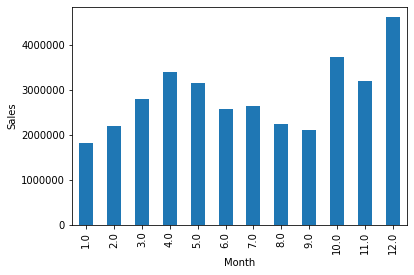

In [27]:
data.groupby('Month')['Sales'].sum().plot(kind = 'bar')
plt.ylabel('Sales')

We used `plt.ylabel()` to specify a name for the y-axis.


> ### 2. What Product sold more?


To know what product sold more, is similar to asking for the frequency of each unique product in our dataset. For that reason, we first need to index the product column `data[‘Product’]`. Then we use the value_counts() function to get the frequency table. Finaly, we make a plot using the plot() function.


In [28]:
data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

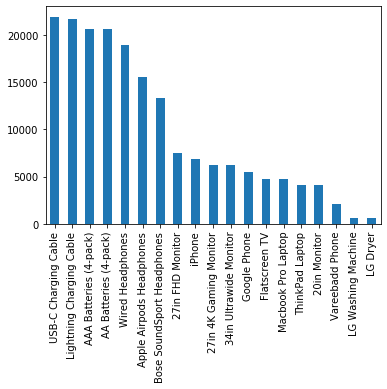

In [29]:
data['Product'].value_counts().plot(kind = 'bar')

> ### 3. What time should we display advertisements to maximize likelihood of customer's buying product?


We tackle this question same way we tacked the first one, by grouping the ‘Hours’, then index the sales and finally making the plot.


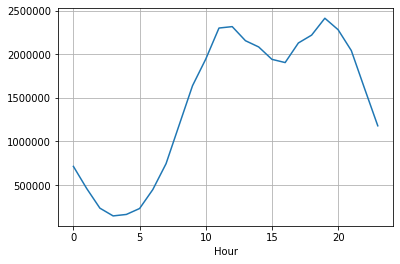

In [30]:
data.groupby('Hour')['Sales'].sum().plot()
plt.grid()

From this, we know that the best time to display adverts is by 11 or 19

In [31]:
data.groupby('Product')['Price Each'].max()

Product
20in Monitor                  109.99
27in 4K Gaming Monitor        389.99
27in FHD Monitor              149.99
34in Ultrawide Monitor        379.99
AA Batteries (4-pack)           3.84
AAA Batteries (4-pack)          2.99
Apple Airpods Headphones       150.0
Bose SoundSport Headphones     99.99
Flatscreen TV                  300.0
Google Phone                   600.0
LG Dryer                       600.0
LG Washing Machine             600.0
Lightning Charging Cable       14.95
Macbook Pro Laptop            1700.0
ThinkPad Laptop               999.99
USB-C Charging Cable           11.95
Vareebadd Phone                400.0
Wired Headphones               11.99
iPhone                         700.0
Name: Price Each, dtype: object

# ASSIGNMENT

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
film = pd.read_csv('IMDB-Movie-Data 2.csv')

In [34]:
film.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [35]:
film.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [36]:
film.dropna(how='any', inplace=True)

In [37]:
film.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [38]:
 # film with the most rankings
film['Ranking'] = film['Rating'].astype('float')

In [39]:
film.groupby('Rating')['Ranking'].sum()

Rating
1.9      1.9
2.7      2.7
3.9      7.8
4.0      4.0
4.1      4.1
4.3     12.9
4.4      4.4
4.6      9.2
4.7     14.1
4.8      4.8
4.9     29.4
5.0      5.0
5.1     25.5
5.2     31.2
5.3     42.4
5.4     54.0
5.5     60.5
5.6     72.8
5.7     91.2
5.8    121.8
5.9     88.5
6.0    120.0
6.1    134.2
6.2    204.6
6.3    226.8
6.4    192.0
6.5    227.5
6.6    244.2
6.7    281.4
6.8    224.4
6.9    158.7
7.0    301.0
7.1    284.0
7.2    273.6
7.3    270.1
7.4    214.6
7.5    247.5
7.6    197.6
7.7    192.5
7.8    296.4
7.9    158.0
8.0    152.0
8.1    194.4
8.2     73.8
8.3     41.5
8.4     16.8
8.5     51.0
8.6     25.8
8.8      8.8
9.0      9.0
Name: Ranking, dtype: float64

In [40]:
# film with the best revenue 
film['Profit'] = film['Revenue (Millions)'].astype('float')


In [41]:
film.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Ranking,Profit
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,8.1,333.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,7.0,126.46
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,7.3,138.12
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,7.2,270.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,6.2,325.02


In [42]:
film.groupby('Year')['Profit'].sum()

Year
2006     3577.48
2007     4095.26
2008     4681.22
2009     5208.39
2010     5989.65
2011     5341.09
2012     6826.39
2013     7399.11
2014     7945.33
2015     8799.09
2016    11002.09
Name: Profit, dtype: float64

In [46]:
# Film with the most votes


NameError: name 'Votes' is not defined

KeyError: 'Column not found: MVP'